In [3]:
import pandas as pd
import numpy as np
import pyodbc
import urllib
from sqlalchemy import create_engine,text

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port

server   = 'sqlserver-sysdev3.database.windows.net'
database = 'storage-db'
username = 'admin-sysdev'
password = 'Adaro123'   
driver   = '{ODBC Driver 17 for SQL Server}'

conn = f"""Driver={driver};Server=tcp:{server},1433;Database={database};
Uid={username};Pwd={password};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"""

params = urllib.parse.quote_plus(conn)
conn_str = 'mssql+pyodbc:///?autocommit=true&odbc_connect={}'.format(params)
engine = create_engine(conn_str, echo=True)

query = 'SELECT Tanggal, Jarak_Outlet, Dimanfaatkan, Dekat_Pemukiman, Curah_Hujan, Debit_Outlet_Diizinkan, Debit_Actual_Outlet, TSS_Actual_Outlet, Project_Bukaan_lahan, TSS_Sungai_Sebelum_Project, TSS_Sungai_Sesudah_Project, TSS_Sungai FROM qhse.[Tbl_tss_padang_panjang]'

with engine.connect() as connection:
    sales = pd.read_sql_query(sql=text(query), con=connection)
sales.head(5)

2024-05-15 16:45:48,293 INFO sqlalchemy.engine.Engine SELECT CAST(SERVERPROPERTY('ProductVersion') AS VARCHAR)


2024-05-15 16:45:48,295 INFO sqlalchemy.engine.Engine [raw sql] ()


2024-05-15 16:45:48,381 INFO sqlalchemy.engine.Engine SELECT schema_name()


2024-05-15 16:45:48,382 INFO sqlalchemy.engine.Engine [generated in 0.00174s] ()


2024-05-15 16:45:48,591 INFO sqlalchemy.engine.Engine SELECT CAST('test max support' AS NVARCHAR(max))


2024-05-15 16:45:48,592 INFO sqlalchemy.engine.Engine [generated in 0.00118s] ()


2024-05-15 16:45:48,670 INFO sqlalchemy.engine.Engine SELECT 1 FROM fn_listextendedproperty(default, default, default, default, default, default, default)


2024-05-15 16:45:48,670 INFO sqlalchemy.engine.Engine [generated in 0.00075s] ()


2024-05-15 16:45:48,747 INFO sqlalchemy.engine.Engine BEGIN (implicit)


2024-05-15 16:45:48,747 INFO sqlalchemy.engine.Engine SELECT Tanggal, Jarak_Outlet, Dimanfaatkan, Dekat_Pemukiman, Curah_Hujan, Debit_Outlet_Diizinkan, Debit_Actual_Outlet, TSS_Actual_Outlet, Project_Bukaan_lahan, TSS_Sungai_Sebelum_Project, TSS_Sungai_Sesudah_Project, TSS_Sungai FROM qhse.[Tbl_tss_padang_panjang]


2024-05-15 16:45:48,748 INFO sqlalchemy.engine.Engine [generated in 0.00152s] ()


2024-05-15 16:45:48,995 INFO sqlalchemy.engine.Engine ROLLBACK


,Tanggal,Jarak_Outlet,Dimanfaatkan,Dekat_Pemukiman,Curah_Hujan,Debit_Outlet_Diizinkan,Debit_Actual_Outlet,TSS_Actual_Outlet,Project_Bukaan_lahan,TSS_Sungai_Sebelum_Project,TSS_Sungai_Sesudah_Project,TSS_Sungai
0,2022-01-01,0.37,True,True,8.3,3.2,0.5418,15.0,True,38.42,29.6,26.0
1,2022-01-02,0.37,True,True,0.0,3.2,0.4816,14.0,True,38.42,29.6,20.0
2,2022-01-03,0.37,True,True,4.0,3.2,0.5418,19.0,True,38.42,29.6,159.0
3,2022-01-04,0.37,True,True,0.0,3.2,0.4816,14.0,True,38.42,29.6,20.0
4,2022-01-05,0.37,True,True,7.5,3.2,0.4816,3.0,True,38.42,29.6,6.0


In [11]:
result = sales.dtypes
print(result)

Tanggal                       datetime64[ns]
Jarak_Outlet                         float64
Dimanfaatkan                            bool
Dekat_Pemukiman                         bool
Curah_Hujan                          float64
Debit_Outlet_Diizinkan               float64
Debit_Actual_Outlet                  float64
TSS_Actual_Outlet                    float64
Project_Bukaan_lahan                    bool
TSS_Sungai_Sebelum_Project           float64
TSS_Sungai_Sesudah_Project           float64
TSS_Sungai                           float64
dtype: object


In [12]:
daily_sales = df.groupby("Tanggal")[["TSS_Sungai"]].sum()
daily_sales

,TSS_Sungai
Tanggal,
2022-01-01,26.0
2022-01-02,20.0
2022-01-03,159.0
2022-01-04,20.0
2022-01-05,6.0
...,...
2023-12-27,30.0
2023-12-28,72.0
2023-12-29,46.0


In [7]:
start_train = "2022-01-01"
end_train = "2023-06-30"

In [8]:
data_train = daily_sales.loc[start_train:end_train]
data_train

,TSS_Sungai
Tanggal,
2022-01-01,26.00
2022-01-02,20.00
2022-01-03,159.00
2022-01-04,20.00
2022-01-05,6.00
...,...
2023-06-26,19.00
2023-06-27,16.00
2023-06-28,62.00


In [13]:
# JALANKAN CODE INI
# Buat tanggal awal dan akhir untuk data test
start_test = "2023-07-01"
end_test = "2023-12-31"
# JALANKAN CODE INI
# Ambil data test sesuai tanggal awal dan akhir
# Gunakan sintax .loc[...:] isi titik-titik awal dengan tanggal awal
data_test = daily_sales.loc[start_test:]
data_test

,TSS_Sungai
Tanggal,
2023-07-01,35.0
2023-07-02,35.0
2023-07-03,63.0
2023-07-04,68.0
2023-07-05,14.0
...,...
2023-12-27,30.0
2023-12-28,72.0
2023-12-29,46.0


In [14]:
# JALANKAN SAJA CODE INI
# Baca file data train
data_train

,TSS_Sungai
Tanggal,
2022-01-01,26.00
2022-01-02,20.00
2022-01-03,159.00
2022-01-04,20.00
2022-01-05,6.00
...,...
2023-06-26,19.00
2023-06-27,16.00
2023-06-28,62.00


In [15]:
# JALANKAN SAJA CODE INI
# Buat fungsi prediksi yang menghitung rata rata dari y
def mean_method(y):
    return y.mean()

In [16]:
# JALANKAN SAJA CODE INI
# Siapkan nama kolom variable dan hasil forecast
col = "TSS_Sungai"
col_forecast = "forecast_mean"

# Untuk setiap tanggal di data test
for h in data_test.index:
    # Buat prediksi
    pred = mean_method(y = data_train[col])
    # Masukkan hasil prediksi ke dalam data_test
    data_test.loc[h, col_forecast] = pred

<ipython-input-16-bfb732ac45da>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[h, col_forecast] = pred


In [17]:
# JALANKAN SAJA CODE INI
data_test

,TSS_Sungai,forecast_mean
Tanggal,,
2023-07-01,35.0,38.4163
2023-07-02,35.0,38.4163
2023-07-03,63.0,38.4163
2023-07-04,68.0,38.4163
2023-07-05,14.0,38.4163
...,...,...
2023-12-27,30.0,38.4163
2023-12-28,72.0,38.4163
2023-12-29,46.0,38.4163


In [18]:
# JALANKAN SAJA CODE INI
# Ambil tanggal 14 hari sebelum tanggal pertama dari data test dari data asli
start_test_min = pd.to_datetime(start_test) + pd.DateOffset(-14)

# Ambil 14 hari untuk tampilan visualisasi
data_train_test = daily_sales.loc[start_test_min:].copy()

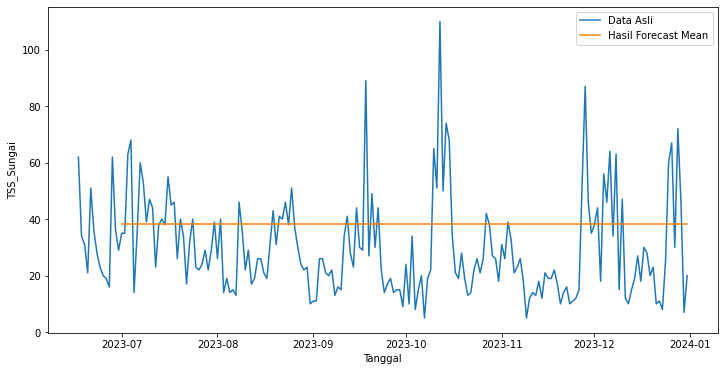

In [19]:
# JALANKAN SAJA CODE INI
# buat ukuran gambar
plt.figure(figsize=(12, 6))
# buat lineplot dari data dengan sumbu sumbu x dan y dari kolom data
# beri label sesuai nama lineplot
sns.lineplot(data = data_train_test,
             x='Tanggal',
             y='TSS_Sungai',
             label = "Data Asli")

sns.lineplot(data = data_test,
             x='Tanggal',
             y='forecast_mean',
             label = "Hasil Forecast Mean")

plt.show()

In [20]:
# JALANKAN SAJA CODE INI
# Buat fungsi untuk mengambil nilai sebelumnya sebagai hasil forecasting
def naive(y, h):
    # Ekstrak 1 data sebelumnya dari tanggal h dengan `pd.DateOffset(-1)`
    h_prev = h + pd.DateOffset(-1)

    # Beri format waktu
    h_prev = h_prev.strftime('%Y-%m-%d')

    return y.loc[h_prev]

In [23]:
# JALANKAN SAJA CODE INI
# Siapkan nama kolom hasil forecast
col_forecast = "forecast_naive"

#data_train_test[col]

# Untuk setiap tanggal di data test
for h in data_test.index:
    # Buat prediksi dengan memanggil fungsi `naive` dan memasukkan data_train_tes dan tanggal h
    pred = naive(y = data_train_test[col], h = h)
    
    print(h)

    # Masukkan hasil prediksi ke dalam data_test
    data_test.loc[h, col_forecast] = pred

2023-07-01 00:00:00
2023-07-02 00:00:00
2023-07-03 00:00:00
2023-07-04 00:00:00
2023-07-05 00:00:00
2023-07-06 00:00:00
2023-07-07 00:00:00
2023-07-08 00:00:00
2023-07-09 00:00:00
2023-07-10 00:00:00
2023-07-11 00:00:00
2023-07-12 00:00:00
2023-07-13 00:00:00
2023-07-14 00:00:00
2023-07-15 00:00:00
2023-07-16 00:00:00
2023-07-17 00:00:00
2023-07-18 00:00:00
2023-07-19 00:00:00
2023-07-20 00:00:00
2023-07-21 00:00:00
2023-07-22 00:00:00
2023-07-23 00:00:00
2023-07-24 00:00:00
2023-07-25 00:00:00
2023-07-26 00:00:00
2023-07-27 00:00:00
2023-07-28 00:00:00
2023-07-29 00:00:00
2023-07-30 00:00:00
2023-07-31 00:00:00
2023-08-01 00:00:00
2023-08-02 00:00:00
2023-08-03 00:00:00
2023-08-04 00:00:00
2023-08-05 00:00:00
2023-08-06 00:00:00
2023-08-07 00:00:00
2023-08-08 00:00:00
2023-08-09 00:00:00
2023-08-10 00:00:00
2023-08-11 00:00:00
2023-08-12 00:00:00
2023-08-13 00:00:00
2023-08-14 00:00:00
2023-08-15 00:00:00
2023-08-16 00:00:00
2023-08-17 00:00:00
2023-08-18 00:00:00
2023-08-19 00:00:00


<ipython-input-23-401ccc2af81c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[h, col_forecast] = pred


In [24]:
# JALANKAN SAJA CODE INI
data_test

,TSS_Sungai,forecast_mean,forecast_naive
Tanggal,,,
2023-07-01,35.0,38.4163,29.0
2023-07-02,35.0,38.4163,35.0
2023-07-03,63.0,38.4163,35.0
2023-07-04,68.0,38.4163,63.0
2023-07-05,14.0,38.4163,68.0
...,...,...,...
2023-12-27,30.0,38.4163,67.0
2023-12-28,72.0,38.4163,30.0
2023-12-29,46.0,38.4163,72.0


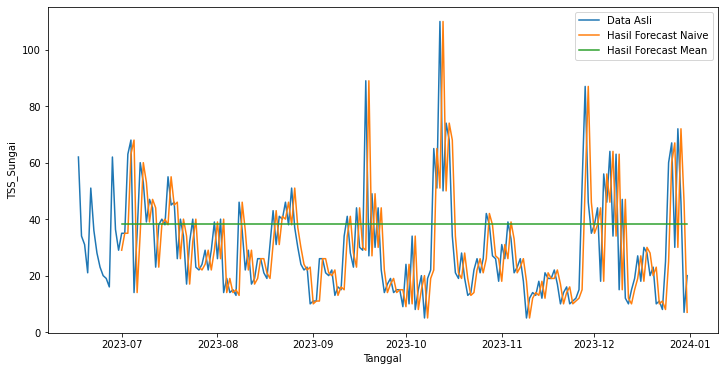

In [26]:
# JALANKAN SAJA CODE INI
# buat ukuran gambar
plt.figure(figsize=(12, 6))
# buat lineplot dari data dengan sumbu sumbu x dan y dari kolom data
# beri label sesuai nama lineplot
sns.lineplot(data = data_train_test,
             x = 'Tanggal',
             y = 'TSS_Sungai',
             label = "Data Asli")

sns.lineplot(data = data_test,
             x = 'Tanggal',
             y = 'forecast_naive',
             label = "Hasil Forecast Naive")

sns.lineplot(data = data_test,
             x = 'Tanggal',
             y = 'forecast_mean',
             label = "Hasil Forecast Mean")

plt.show()

In [27]:
# JALANKAN SAJA CODE INI
# Buat fungsi untuk mengambil nilai di 1 periode sebelumnya
def snaive(y, h, m):

    # Hitung rentang hari dari awal awal data testing sampai data yang ingin diprediksi
    # Misal tanggal yang ingin diprediksi "2016-01-02"
    # Tanggal awal data testing "2016-01-01"
    # h_int = 2
    h_int = (h - pd.to_datetime(start_test)).days - 1

    # Hitung besar periode m dari tanggal awal, misal rentang hari 29 dari hari awal, k = (2-1)/7 = 0
    k = int((h_int - 1)/m)

    # Ambil tanggal acuan nilai forecast
    # Misal tanggal yang ingin diprediksi "2016-01-02"
    # pd.DateOffset(-m * (k+1)) adalah -7 x (0+1) = -7
    # Maka ambil tanggal 7 hari sebelum tanggal "2016-01-02", yaitu '2015-12-26'
    h_pred = h + pd.DateOffset(-m * (k+1))
    h_pred = h_pred.strftime('%Y-%m-%d')

    return y.loc[h_pred]

In [28]:
# JALANKAN SAJA CODE INI
# Siapkan nama kolom hasil forecast
col_forecast = "forecast_snaive"

# Untuk setiap tanggal di data test
for h in data_test.index:
    # Buat prediksi
    pred = snaive(y = data_train_test[col],
                  h = h,
                  m = 7) # data kita punya seasonality mingguan, maka m = 7
    # Masukkan ke dalam Masukkan
    data_test.loc[h, col_forecast] = pred

<ipython-input-28-ab5c75b3cbae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[h, col_forecast] = pred


In [29]:
# JALANKAN SAJA CODE INI
# menampilkan 14 hari sebelum tanggal awal data test (2016-01-01)
data_train_test.head(14)

,TSS_Sungai
Tanggal,
2023-06-17,62.00
2023-06-18,34.00
2023-06-19,31.00
2023-06-20,21.00
2023-06-21,51.00
2023-06-22,36.00
2023-06-23,28.00
2023-06-24,23.00
2023-06-25,20.00


In [30]:
# JALANKAN SAJA CODE INI
# Tampilkan Hasil forecast
# terlihat hasil forecast_snaive di tanggal 2016-01-02 = nilai total_unit_sold di tanggal 2015-12-26
data_test.head()

,TSS_Sungai,forecast_mean,forecast_naive,forecast_snaive
Tanggal,,,,
2023-07-01,35.0,38.4163,29.0,23.0
2023-07-02,35.0,38.4163,35.0,20.0
2023-07-03,63.0,38.4163,35.0,19.0
2023-07-04,68.0,38.4163,63.0,16.0
2023-07-05,14.0,38.4163,68.0,62.0


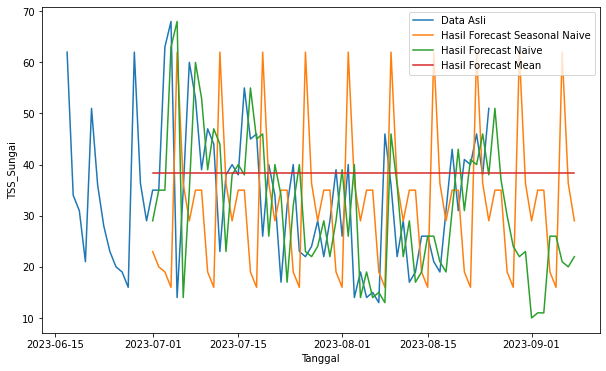

In [32]:
# LENGKAPI CODE DISINI
# Isi bagian kosong dengan nama kolom hasil forecasting seasonal naive
# Kemudian jalankan cell ini
plt.figure(figsize=(10, 6))

sns.lineplot(data = data_train_test.head(70), x='Tanggal', y='TSS_Sungai', label = "Data Asli")
sns.lineplot(data = data_test.head(70), x='Tanggal', y='forecast_snaive', label = "Hasil Forecast Seasonal Naive")
sns.lineplot(data = data_test.head(70), x='Tanggal', y='forecast_naive', label = "Hasil Forecast Naive")
sns.lineplot(data = data_test.head(70), x='Tanggal', y='forecast_mean', label = "Hasil Forecast Mean")
plt.show()

In [33]:
# JALANKAN SAJA CODE INI
# Panggil library untuk plot ACF dan pengecekan stationary
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import adfuller

In [35]:
# JALANKAN SAJA CODE INI
# Cek statarionary dengan `adfuller()`, masukkan data time series yang igin dicek
result = adfuller(data_train['TSS_Sungai'])

# Tampilkan hasil p-value
print('p-value: %f' % result[1])

p-value: 0.000000


In [36]:
# JALANKAN SAJA CODE INI
# Lakukan differencing pada data dengan `diff()`
sales_diff = data_train['TSS_Sungai'].diff().fillna(0)
sales_diff

Tanggal
2022-01-01      0.00
2022-01-02     -6.00
2022-01-03    139.00
2022-01-04   -139.00
2022-01-05    -14.00
               ...  
2023-06-26     -1.00
2023-06-27     -3.00
2023-06-28     46.00
2023-06-29    -25.67
2023-06-30     -7.33
Name: TSS_Sungai, Length: 546, dtype: float64

In [37]:
# JALANKAN SAJA CODE INI
# Lihat data asli 31749 - 32631 = -882
data_train['TSS_Sungai'].head()

Tanggal
2022-01-01     26.0
2022-01-02     20.0
2022-01-03    159.0
2022-01-04     20.0
2022-01-05      6.0
Name: TSS_Sungai, dtype: float64

In [38]:
# JALANKAN SAJA CODE INI
# Cek statarionary dengan `adfuller()`, masukkan data time series yang igin dicek
# Cek stationary dengan `adfuller`
result = adfuller(sales_diff)

# Tampilkan hasil p-value
print('p-value: %f' % result[1])

p-value: 0.000000


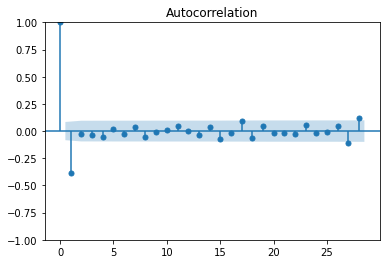

In [39]:
# JALANKAN SAJA CODE INI
# Tampilkan plot ACF dengan plot_acf(), masukkan data yang sudah di-differencing
plot_acf(sales_diff)
plt.show()

In [40]:
# JALANKAN SAJA CODE INI
# panggil library statsmodels, library yang sering digunakan untuk pemodelan statistik khususnya SARIMAX
# SARIMAX digunakan untuk membangun model seasonal ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
# JALANKAN SAJA CODE INI
# Buat model Seasonal ARIMA dengan order p = 0, d = 1, q = 2 dan seasonal_order p = 0, d = 0, q = 1 dan m = 7
##### WARNING : Harus bisa baca pola di chart autocorrelation untuk menentukan seasonal order di bawah
forecast_model_results = SARIMAX(data_train['TSS_Sungai'],
                                 order = (0, 1, 2),
                                 seasonal_order = (0, 2, 1, 7)).fit()

D:\Users\fardiansyah\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Users\fardiansyah\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Users\fardiansyah\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [85]:
# JALANKAN SAJA CODE INI
# Extract hasil forecasting pada data test, gunakan start_test dan end_test
point_forecast_result = forecast_model_results.get_prediction(start = start_test,
                                                              end = end_test)

In [86]:
# JALANKAN SAJA CODE INI
# Ambil nilai forecast
temp = point_forecast_result.predicted_mean.to_frame().reset_index()
# Tampilan hasil
temp

,index,predicted_mean
0,2023-07-01,23.468684
1,2023-07-02,19.725456
2,2023-07-03,16.912923
3,2023-07-04,15.673691
4,2023-07-05,62.452878
...,...,...
179,2023-12-27,71.535010
180,2023-12-28,30.820279
181,2023-12-29,19.742680
182,2023-12-30,13.171287


In [87]:
# JALANKAN SAJA CODE INI
# Ganti nama kolom
temp.columns = ['Tanggal', 'TSS_Sungai_forecast']
temp

,Tanggal,TSS_Sungai_forecast
0,2023-07-01,23.468684
1,2023-07-02,19.725456
2,2023-07-03,16.912923
3,2023-07-04,15.673691
4,2023-07-05,62.452878
...,...,...
179,2023-12-27,71.535010
180,2023-12-28,30.820279
181,2023-12-29,19.742680
182,2023-12-30,13.171287


In [88]:
# JALANKAN SAJA CODE INI
# Simpan dalam data_test

# Sesuaikan index tanggal
temp["TSS_Sungai_forecast"].index = data_test.index
# Simpan di kolom `total_unit_sold_forecast`
data_test["forecast_sarima"] = temp["TSS_Sungai_forecast"].copy()
data_test

<ipython-input-88-dd599bf53149>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["forecast_sarima"] = temp["TSS_Sungai_forecast"].copy()


,TSS_Sungai,forecast_mean,forecast_naive,forecast_snaive,forecast_sarima
Tanggal,,,,,
2023-07-01,35.0,38.4163,29.0,23.00,23.468684
2023-07-02,35.0,38.4163,35.0,20.00,19.725456
2023-07-03,63.0,38.4163,35.0,19.00,16.912923
2023-07-04,68.0,38.4163,63.0,16.00,15.673691
2023-07-05,14.0,38.4163,68.0,62.00,62.452878
...,...,...,...,...,...
2023-12-27,30.0,38.4163,67.0,62.00,71.535010
2023-12-28,72.0,38.4163,30.0,36.33,30.820279
2023-12-29,46.0,38.4163,72.0,29.00,19.742680


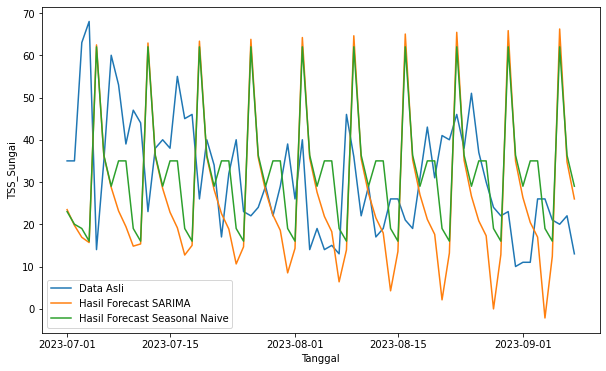

In [89]:
# JALANKAN SAJA CODE INI
# Visualisasikan Hasil Forecasting dari Seasonal Naive, Seasonal ARIMA dan Data Asli
plt.figure(figsize=(10, 6))

sns.lineplot(data = data_test.head(70), x='Tanggal', y='TSS_Sungai', label = "Data Asli")
sns.lineplot(data = data_test.head(70), x='Tanggal', y='forecast_sarima', label = "Hasil Forecast SARIMA")

sns.lineplot(data = data_test.head(70), x='Tanggal', y='forecast_snaive', label = "Hasil Forecast Seasonal Naive")
plt.show()

In [90]:
# JALANKAN SAJA CODE INI
# Panggil library untuk menghitung error dari forecast
from sklearn.metrics import mean_squared_error

In [91]:
# JALANKAN SAJA CODE INI
# Masukkan data asli data_test["total_unit_sold"] sebagai y_true
# Masukkan data asli data_test["forecast_sarima"] sebagai y_pred
mse_sarima = mean_squared_error(y_true = data_test["TSS_Sungai"],
                                y_pred = data_test["forecast_sarima"])
rmse_sarima = np.sqrt(mse_sarima)

print('RMSE Model Seasonal ARIMA :', rmse_sarima)

RMSE Model Seasonal ARIMA : 30.1837626884449


In [92]:
# LENGKAPI CODE DISINI
# hitung error dari metode seasonal naive
mse_sarima = mean_squared_error(y_true = data_test["TSS_Sungai"], # Isi "..." dengan nama kolom data asli
                                y_pred = data_test["forecast_snaive"]) # Isi "..." dengan nama kolom hasil seasonal naive
rmse_sarima = np.sqrt(mse_sarima)

print('RMSE Model Seasonal Naive :', rmse_sarima)

RMSE Model Seasonal Naive : 23.802042682710347


In [94]:
# JALANKAN SAJA CODE INI
# Buat fungsi untuk menampilkan hasil forecast
def forecast(start_date, end_date):
    # panggil model `forecast_model_results`
    point_forecast_result = forecast_model_results.get_prediction(start = start_date,
                                                                  end = end_date)
    # simpan hasil di temp
    temp = point_forecast_result.predicted_mean.to_frame().reset_index()
    # ganti nama kolom
    temp.columns = ['date', 'forecast']
    return temp

In [95]:
# JALANKAN SAJA CODE INI
# Buat fungsi untuk menampilkan visualisasi hasil forecast
def viz_forecast(forecast):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data = forecast, x='date', y='forecast', label = "Hasil Forecast")

In [96]:
# LENGKAPI CODE DISINI
# Masukkan tanggal awal yang ingin dilakukan forecast pada start_date, misal "2016-01-01"
# Masukkan tanggal akhir yang ingin dilakukan forecast pada end_data, misal "2016-01-21"
forecast(start_date = "2024-01-01", end_date = "2024-12-31")

,date,forecast
0,2024-01-01,-39.770079
1,2024-01-02,4.770657
2,2024-01-03,71.808703
3,2024-01-04,30.515328
4,2024-01-05,19.293591
...,...,...
361,2024-12-27,-12.748404
362,2024-12-28,-21.399952
363,2024-12-29,-22.922413
364,2024-12-30,-167.112526


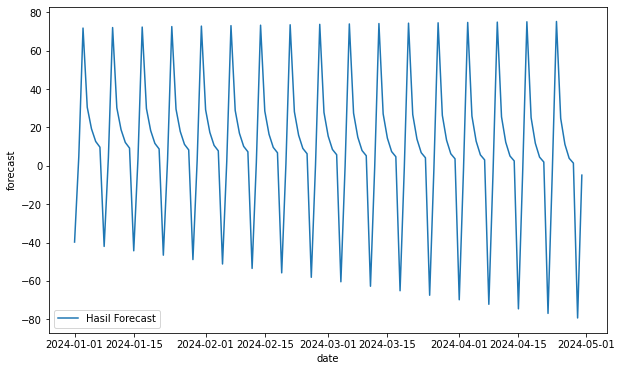

In [97]:
# LENGKAPI CODE DISINI
# JALANKAN SAJA CODE INI
# ganti "..." dengan forecast(start_date = "...", end_date = "...")
# Masukkan tanggal awal yang ingin dilakukan forecast pada start_date, misal "2016-01-01"
# Masukkan tanggal akhir yang ingin dilakukan forecast pada end_data, misal "2016-01-21"
viz_forecast(forecast(start_date = "2024-01-01", end_date = "2024-04-30"))